## Modelo SVM

# 1. Problema de Negócio

As aulas online tomaram força durante esse periodo de pandemia, visando a saúde da população como um todo, tivemso diversas restrições sanitárias e com isso surgiu um problema: Como os estudantes teriam aula? As crianças ficariam sem estudar? O SARS-COV-2 era um monstro gigantesco que estava matando a população, separando familias e destruindo lares. As consequências de ter enfrentado algo tão grandioso ainda paira sobre e com isso vem a nossa principal dúvida, afinal, os estudantes se adaptaram ao modelo tele=presencial? as crianças conseguiram aprender? Esperamos ter uma vizualização de como de fato os estudantes das mais variadas idades e séries que conseguimos encontrar lidaram com o ensino remoto e o que aprenderam durante esse periodo. 

Para que pudessemos analisar esses dados, uitilizamos um dataset disponibilizado no Kaggle


# 2. Modelo

Para realizar uma dessas análises utilizamos o modelo SVM - Support Vector Machine. Trata-se de um modelo de aprendizagem de máquina supervionado que deriva de duas fundamentações sólidas: Teoria da Aprendizagem Estatísta e Otimização Matemática. Na prática o SVM coloca em primeiro lugar a classificação das classes, definindo assim cada ponto pertencente a cada uma das classes, e em seguida maximiza a margem. Ou seja, ele primeiro classifica as classes corretamente e depois em função dessa restrição define a distância entre as margens

# 3. Iniciando a análise dos dados coletados

In [31]:
# # Importando as Bibliotecas
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import matplotlib.pyplot as plt

In [2]:
# Carregando o dataset

df = pd.read_excel("C:/Users/letic/OneDrive/Área de Trabalho/TBPJTI/estudantes.xlsx")
df

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,Boy,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,4G,2022-06-03 00:00:00,No,Tab,Moderate
1,Girl,21-25,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,2022-03-01 00:00:00,Yes,Mobile,Moderate
2,Girl,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,2022-03-01 00:00:00,No,Mobile,Moderate
3,Girl,2015-11-01 00:00:00,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,2022-03-01 00:00:00,No,Mobile,Moderate
4,Girl,16-20,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,0,No,Mobile,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,Girl,16-20,College,Non Government,No,Yes,Low,Mid,Wifi,4G,2022-03-01 00:00:00,No,Mobile,Low
1201,Girl,16-20,College,Non Government,No,No,High,Mid,Wifi,4G,2022-06-03 00:00:00,No,Mobile,Moderate
1202,Boy,2015-11-01 00:00:00,School,Non Government,No,Yes,Low,Mid,Mobile Data,3G,2022-03-01 00:00:00,No,Mobile,Moderate
1203,Girl,16-20,College,Non Government,No,No,Low,Mid,Wifi,4G,2022-03-01 00:00:00,No,Mobile,Low


In [3]:
# Descobrindo os tipos de variavies que as colunas estão

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Gender               1205 non-null   object
 1   Age                  1205 non-null   object
 2   Education Level      1205 non-null   object
 3   Institution Type     1205 non-null   object
 4   IT Student           1205 non-null   object
 5   Location             1205 non-null   object
 6   Load-shedding        1205 non-null   object
 7   Financial Condition  1205 non-null   object
 8   Internet Type        1205 non-null   object
 9   Network Type         1205 non-null   object
 10  Class Duration       1205 non-null   object
 11  Self Lms             1205 non-null   object
 12  Device               1205 non-null   object
 13  Adaptivity Level     1205 non-null   object
dtypes: object(14)
memory usage: 131.9+ KB


In [4]:
#Transformando os dados não númericos em númericos.

df = df[['Gender', 'Age', 'Education Level', 'Institution Type', 'IT Student', 'Location', 'Load-shedding', 'Financial Condition', 'Internet Type', 'Network Type', 'Self Lms', 'Device', 'Adaptivity Level']].apply(lambda x: pd.factorize(x)[0])
df

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Self Lms,Device,Adaptivity Level
0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,1,0,1,0,1,1,0
2,1,1,1,1,0,0,0,0,0,0,0,1,0
3,1,2,2,0,0,0,0,0,1,0,0,1,0
4,1,1,2,0,0,0,0,1,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,1,1,1,0,0,0,0,0,0,0,0,1,1
1201,1,1,1,0,0,1,1,0,0,0,0,1,0
1202,0,2,2,0,0,0,0,0,1,1,0,1,0
1203,1,1,1,0,0,1,0,0,0,0,0,1,1


In [5]:
#Definindo as variaveis

X = df[['Gender','Age', 'Education Level', 'Institution Type', 'IT Student', 'Location', 'Load-shedding', 'Financial Condition', 'Internet Type', 'Network Type', 'Self Lms', 'Device']]
y = df['Adaptivity Level']


In [6]:

cat_variaveis = ['Gender', 'Education Level', 'Institution Type', 'IT Student', 'Location', 'Load-shedding', 'Financial Condition', 'Internet Type', 'Network Type', 'Self Lms', 'Device']
X_cat = OneHotEncoder(sparse=False, handle_unknown='ignore').fit_transform(X[cat_variaveis])

In [7]:

num_variables = ['Age']
X_num = FunctionTransformer(np.log1p).fit_transform(X[num_variables])

X = pd.concat([X_num.reset_index(drop=True), pd.DataFrame(X_cat)], axis=1)

In [8]:
#Variaveis de treino e teste

X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.30, random_state=41)

In [17]:
classifier = SVC(gamma='auto')
classifier.fit(X_train, y_train)

SVC(gamma='auto')

In [18]:
classifier.score(X_test, y_test)

0.6574585635359116

In [19]:
y_pred = classifier.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.61      0.89      0.72       181
           1       0.79      0.49      0.61       154
           2       1.00      0.04      0.07        27

    accuracy                           0.66       362
   macro avg       0.80      0.47      0.47       362
weighted avg       0.72      0.66      0.62       362



In [33]:
# Aplicando o SVM

kernel = ['linear', 'poly', 'rbf', 'sigmoid']
decision_function_shape = ['ovo', 'ovr']
C = [0.1, 1, 10, 100, 1000]
gama = [1, 0.1, 0.01, 0.001, 0.0001]
param_grid = dict(kernel=kernel, decision_function_shape=decision_function_shape)

svc = SVC(probability=True, random_state=42)
svc = GridSearchCV(svc, param_grid, scoring='accuracy')
  
svc.fit(X_train, y_train)

print(svc.best_params_)

{'decision_function_shape': 'ovo', 'kernel': 'poly'}


In [34]:
svc_param = pd.DataFrame(svc.cv_results_)[['mean_test_score', 'params']].sort_values(by='mean_test_score', ascending=False)
svc_param['params'] = svc_param['params'].astype('string')
novo = svc_param['params'].str.split(',', expand=True)
svc_param['decision_function_shape'] = novo[0]
svc_param['kernel'] = novo[1]
svc_param['decision_function_shape'] = svc_param['decision_function_shape'].replace("{'decision_function_shape': '", '', regex=True)
svc_param['decision_function_shape'] = svc_param['decision_function_shape'].replace("'", '', regex=True)
svc_param['kernel'] = svc_param['kernel'].replace("'kernel': '", '', regex=True)
svc_param['kernel'] = svc_param['kernel'].replace("'}", '', regex=True)
svc_param.drop('params', axis=1, inplace=True)

In [35]:
svc_param.groupby(['kernel', 'decision_function_shape']).mean()

mean_test_score
kernel                decision_function_shape                           
 'kernel': 'linear'}  {'decision_function_shape': 'ovo'         0.639335
                      {'decision_function_shape': 'ovr'         0.639335
 'kernel': 'poly'}    {'decision_function_shape': 'ovo'         0.785263
                      {'decision_function_shape': 'ovr'         0.785263
 'kernel': 'rbf'}     {'decision_function_shape': 'ovo'         0.749711
                      {'decision_function_shape': 'ovr'         0.749711
 'kernel': 'sigmoid'} {'decision_function_shape': 'ovo'         0.463764
                      {'decision_function_shape': 'ovr'         0.463764

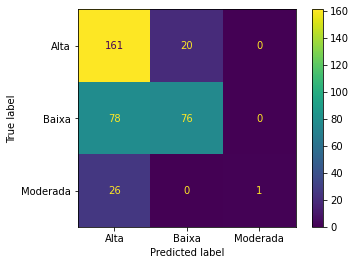

In [36]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

svcm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Alta','Baixa','Moderada'])

svcm_display.plot()
plt.show() 

## Vantagens e Desvantagens do SVM

Vantagens:

Eficaz em casos de alta dimensão.
É eficiente em termos de memória, pois usa um subconjunto de pontos de treinamento na função de decisão.
Diferentes funções do kernel podem ser especificadas para as funções de decisão e é possível especificar kernels personalizados.

Desvantagens:

O SVM tem um desempanho melhor em bases de dados grandes, por isso não foi o melhor modelo utilizado por nós. 
